<a href="https://colab.research.google.com/github/SWiwoo/CornStudy/blob/study/chapter2__%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=30786f1ab94ca863685543d8e007e91d154077fb4f23a2caead2fe5ae361d3d5
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:

import mglearn                                        # 앞으로 이 책에서 임포트되었다고 가정할 라이브러리들
import numpy as np
import pandas as pd
from IPython.display import display

from sklearn import datasets                             ## iris와 같은 내장 데이터 사용
from sklearn.model_selection import train_test_split     ## train, test 데이터 분할

from sklearn.linear_model import LinearRegression        ## 선형 회귀분석
from sklearn.linear_model import LogisticRegression      ## 로지스틱 회귀분석
from sklearn.naive_bayes import GaussianNB               ## 나이브 베이즈
from sklearn import svm                                  ## 서포트 벡터 머신
from sklearn import tree                                 ## 의사결정나무
from sklearn.ensemble import RandomForestClassifier      ## 랜덤포레스트
%matplotlib inline
import matplotlib.pyplot as plt                          ## plot 그릴때 사용

## 2.3.4 나이브 베이즈 분류기

    - 나이브 베이즈 분류기는 앞 선형 모델과 매우 유사
    - 훈련 속도는 빠른 편이나 일반화 성능이 조금 뒤짐

    - 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합
    - scikit-learn에서 구현된 나이브 베이즈 분류기는 **GaussianNB , BernoulliNB, MultinomialNB** 이렇게 세 가지
    - GaussianNB :  연속적인 어떤 데이터에도 적용가능
    - BernoulliNB : 이진 데이터
    - MultinomialNB : 카운트 데이터(특성이 정수 카운트, 예를 들면 문장에 나타난 단어의 횟수)
    - 

In [3]:
# BernoulliNB 분류기는 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 셈

X= np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])

y=np.array([0,1,0,1])

## 이진 특성을 4개 가진 데이터 포인트 4개,
## 클래스는 0과 1
## 출력 y의 클래스가 0인 경우(첫 번째와 세 번째 데이터 포인트), 첫 번째 특성은 0이 두번, 0이 아닌 것은 한 번도 없음
## 두 번째 특성은 0이 한번이고 1도 한번


In [4]:
# 클래스별로 0이 아닌 원소를 세는 과정을 요약

counts={}
for label in np.unique(y):
  # 각 클래스에 대해 반복
  # 특성마다 1이 나타난 횟수를 셈
  counts[label]=X[y==label].sum(axis=0)

print("특성 카운트:\n", counts)  

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


MultinomialNBd은 클래스별로 특성의 평균 계산, GaussianNB은 클래스별로 각 특성의 표준편차와 평균을 저장

## 장단점과 매개변수

- multinomial과 bernoulli는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가짐
- alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가
- 이는 통계 데이터를 완만하게 만들어 줌
- alpha가 크면 더 완만해짐 & 복잡도가 낮아짐
- alpha는 알고리즘 성능 변동이 크지 않아 성능 향상에는 별로 기여하지 못함
- 그러나 어느정도는 정확도 높일 수 있음
-
- gaussian은 대부분 매우 고차원인 데이터셋에 사용하고 다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터를 카운트하는 데 사용
- multinomial은 보통 0이 아닌 특성이 비교적 많은 데이터셋에서 bernoulli보다 성능이 높음
-
- 나이브 베이즈 모델과 선형 모델의 장단점은 비슷
- 훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉬움
- 희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않음
- 선형 모델로는 학습 시간이 너무 오래 걸리는 매우 큰 데이터셋에는 나이브 베이즈 모델을 시도해볼 만 함


## 2.3.5 결정 트리

- 결정 트리는 분류와 회귀에 주로 사용
- 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습



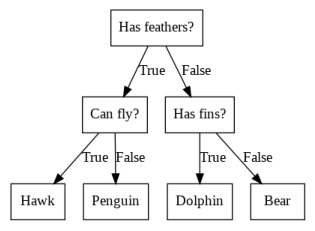

In [5]:
mglearn.plots.plot_animal_tree()   ## 모델의 모습

##  세 개의 특성(날개 유무 등)을 사용해 네 개의 클래스를 구분하는 모델을 만든 것
## 이런 모델을 직접 만드는 대신 지도 학습 방식으로 데이터로부터 학습할 수 있음

### 결정 트리 만들기


---

- 2차원 데이터셋을 분류하는 결정 트리를 만들 것
- 각 클래스에 데이터 포인트가 50개씩 있고 two_moons라고 부를 것
- 결정 트리를 학습한다는 것은 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다는 뜻
- 머신러닝에서 이런 질문들을 테스트라고 함

- 예/아니오 또는 연속적인 데이터에 적용할 테스트는 "특성 i는 값 a보다 큰가?"하는 형태를 띰

- 트리를 만들 때 알고리즘은 가능한 모든 테스트에서 타깃 값에 대해 가장 많은 정보를 가진 것을 고름
- 데이터를 분할하는 것은 각 분할된 영역이(결정 트리의 리프)한 개의 타깃 값(하나의 클래스나 하나의 회귀 분석 결과)을 가질 때까지 반복됨
- **타깃 하나로만 이뤄진 리프 노드를 순수 노드라고 함**

- 새로운 데이터 포인트에 대한 예측은 주어진 데이터 포인트가 특성을 분할한 영역들 중 어디에 놓이는지를 확인하면 됨
- 그 영역의 타깃 값 중 다수인 것을 예측 결과로 함
- 회귀 문제에서는 리프 노트의 훈련 데이터 평균값이 이 데이터 포인트의 출력이 됨


---


### 결정 트리의 복잡도 제어하기



---


- 일반적으로 트리 만들기를 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합 됨
- 너무 과대적합된 것은 클래스의 포인트들에서 멀리 떨어진 이상치 하나에 너무 민감

- 과대 적합을 막는 전략 : 
    1. 트리 생성을 일찍 중단하는 전략(사전 가지치기)
    2. 트리를 만든 후, 데이터 포인트가 적은 노드를 삭제하거나 병합(사후 가지치기post)

- 사전 가지치기 방법은 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 또한 노드가 분할하기 위한 포인트의 최소 개수를 지정하는 것

- scikit-learn(사전 가지치기만 지원)에서 결정 트리는 DecisionTreeRegressor와 DecisionTreeClassifier에 구현 되어 있음, 

In [6]:
# 유방암 데이터셋을 이용하여 사전 가지치기의 효과를 확인
# 먼저 데이터셋을 읽은 후 훈련 세트와 테스트 세트로 나눔
# 기본값 설정으로 완전한 트리모델을 만듦(모든 리프 노드가 순수 노드가 될 때까지 생성한 트리)
# random_state 옵션을 고정해 만들어진 트리를 같은 조건으로 비교함


from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
                                  cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))
 

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


    - 기대한 대로 모든 리프 노드가 순수 노드이므로 훈련 세트의 정확도는 100%
    - 훈련 데이터의 모든 레이블을 완벽하게 기억할 만큼 충분히 깊에 만들어 짐
    - 테스트 세트의 정확도는 이전에 본 선형 모델에서의 정확도인 95%보다 조금 낮음
    - 사전 가지치기 2가지 방법
    1. 일정 깊이에 도달하면 트리의 성장을 멈추게 함 :  max_depth=4 옵션을 주면 연속된 질문을 최대 4개로 제한 => 트리 깊이를 제한하여 과대적합 줄고 훈련 세트의 정확도 낮아지면서 테스트 성능은 개선

In [7]:
tree=DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


### 결정 트리 분석

- 트리 모듈의 export_graphviz 함수를 이용해 트리를 시작화
- 이 함수는 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만듦
- 각 노드에서 다수인 클래스를 색을 나타내기 위해 옵션을 주고 적절히 레이블되도록 클래스 이름과 특성 이름을 매개변수로 전달

In [8]:
! pip install graphviz
from IPython import display
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"], feature_names=cancer.feature_names, impurity=False, filled=True)

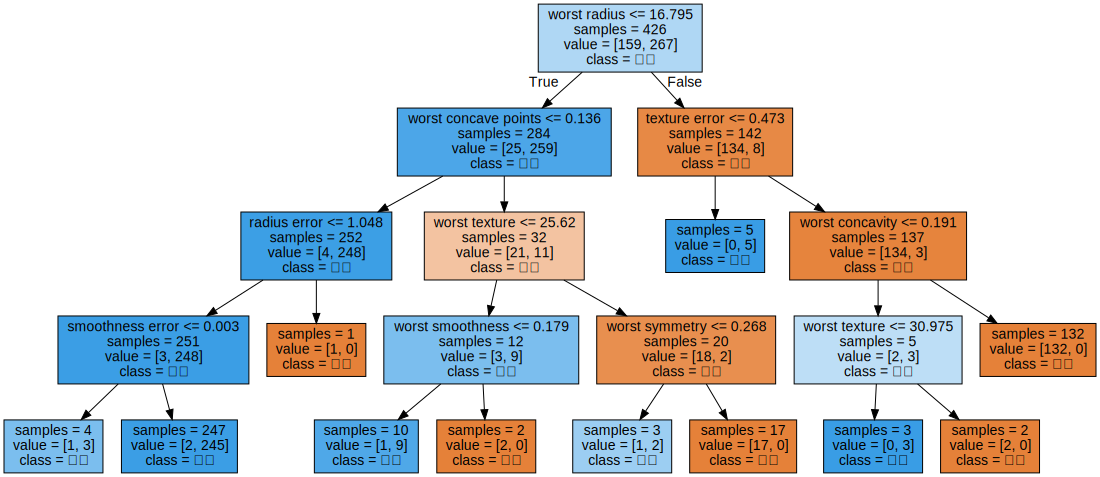

In [9]:
import graphviz
with open("tree.dot") as f:
  dot_graph=f.read()


display.display(graphviz.Source(dot_graph))   ## 모듈 display를 클래스 처럼 사용하면 에러, aaa.aaa()로 불러와 사용해야 함

- 트리를 조사할 때는 많은 수의 데이터가 흐르는 경로를 찾아보면 좋음
- 각 노드에 적힌 samples는 각 노드에 있는 샘플의 수
- value는 클래스당 샘플의 수
- worst radius<=16.795인 데이터는 악성 샘플이 25개, 양성 샘플이 259개

---
### 트리의 특성 중요도

- 전체 트리를 살펴보는 것은 어려움, 트리가 어떻게 작동하는지 요약하는 속성들을 사용 가능
- 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 **특성 중요도**
- 이 값은 0과 1 사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻, 1은 완벽하게 타깃 클래스를 예측했다는 뜻
- 특성 중요도의 전체 합은 1

In [10]:
print("특성 중요도 : \n", tree.feature_importances_)

특성 중요도 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


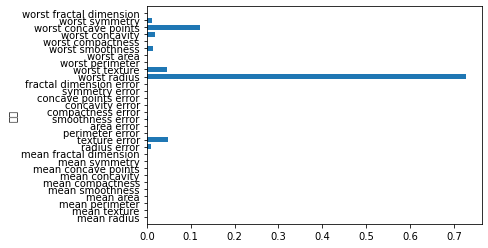

In [11]:
# 특성 중요도 시각화
 
def plot_feature_importances_cancer(model):
  n_features=cancer.data.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_,align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.ylabel("특성")
  plt.ylim(-1,n_features)

plot_feature_importances_cancer(tree)  

- 첫 번째 노드에서 사용한 특성("worst radius")가 가장 중요한 특성으로 나타남
- 첫 번째 노드에서 두 클래스를 꽤 잘 나누고 있다
- feature_importance_값이 낮다고 해서 특성이 유용하지 않은 것은 X
- 단지 트리가 그 특성을 선택하지 않았을 뿐, 다른 특성이 동일한 정보를 지니고 있어서 일 수도 있음
- 선형 모델의 계수와는 달리, 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없음
- 특성 중요도의 값은 worst radius 가 중요하다고 알려주지만 높은 반지름이 양성을 의미하는지 악성을 의미하는지는 알 수 없음

Feature importances: [0. 1.]


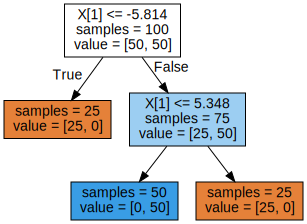

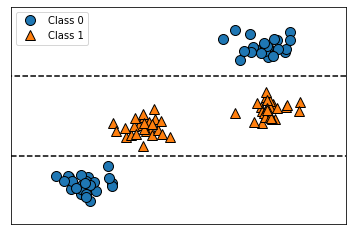

In [12]:
tree=mglearn.plots.plot_tree_not_monotone()
display.display(tree) 

## 두 번째 그림은 y축의 특성이 클래스 레이블과 복합적인 관계를 가지고 있는 2차원 데이터셋과 결정 트리가 만든  결정 경계
## 첫 번째 그림은 아래 그림에 나타난 데이터로 학습한 결정 트리

    이 그림은 두 개의 특성과 두 개의 클래스를 가진 데이터셋을 보여줌
    X[1]에 있는 정보만 사용되었고 X[0]은 전혀 사용되지 않음
    하지만 X[1]과 출력 클래스와의 관계는 단순히 비례/반비례가 아님

    결정 트리를 가지고 분류에 대해서만 논의했지만 DecisionTreeRegressor로 구현된 회귀 결정 트리에서도 비슷하게 적용됨
    DecisionTreeRegressor(그리고 모든 다른 트리 기반 회귀 모델)은 extraploation , 즉 **훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없음**

Text(0, 0.5, 'price($/Mbyte)')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


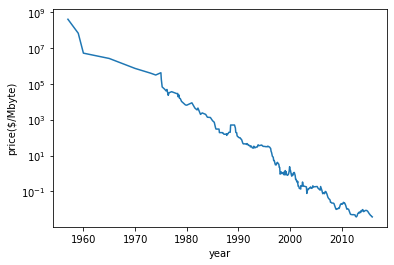

In [13]:
# 컴퓨터 메모리 가격 동향 데이터셋을 이용해 이를 살펴 볼 것
# x축은 날짜, y축은 해당 년도의 RAM 1 메가바이트당 가격

import os
ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price($/Mbyte)")

##  로그 스케일로 그린 램 가격 동향

- y축은 로그 스케일 => 그래프를 로그 스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나서 비교적 예측하기 쉬워짐
- 날짜 특성 하나만으로 2000년 전까지의 데이터로부터 2000년 후의 가격을 예측해보겠음
- 여기서는 간단한 두 모델 DecisionTreeRegressor와 LinearRegression을 비교해 보겠음
- 가격을 로그 스케일로 바꾸었기 때문에 비교적 선형적 관계가 됨
- 로그 스케일로 바꾸어도 DecisionTreeRegressor를 사용하는 데는 아무런 차이가 없지만 LinearRegression에는 큰 차이가 있음
- 모델을 훈련시키고 예측을 수행한 다음 로그 스케일을 되돌리기 위해 지수 함수를 적용
- 그래프 표현을 위해 전체 데이터셋에 대해 예측을 수행하였지만 테스트 데이터셋과의 비교가 관심 대상임

In [14]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듦
data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]

# 가격 예측을 위해 날짜 특성만을 이용함
X_train=data_train.date.to_numpy()[:,np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 하기 위해 로그 스케일 이용
y_train=np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train, y_train)
linear_reg=LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행
X_all=ram_prices.date.to_numpy()[:,np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌림
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)


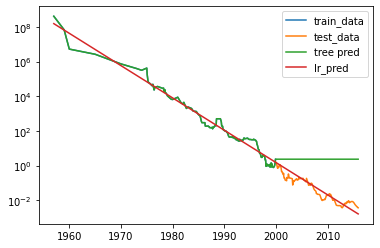

In [15]:
plt.semilogy(data_train.date, data_train.price, label="train_data")
plt.semilogy(data_test.date, data_test.price, label="test_data")
plt.semilogy(ram_prices.date, price_tree, label="tree pred")
plt.semilogy(ram_prices.date, price_lr, label="lr_pred")
plt.legend()

- 두 모델은 확연한 차이를 보임, 선형 모델은 우리가 아는 대로 직선으로 데이터를 근사함
- 이 직선은 훈련 데이터와 테스트 데이터에 있는 미세한 굴곡을 매끈하게 근사하여 테스트 데이터 (2000년 이후)를 꽤 정확히 예측
- 반면에 트리 모델은 훈련 데이터를 완벽하게 예측
- 트리의 복잡도에 제한을 두지 않아서 전체 데이터셋을 모두 기억하기 때문
- 그러나 모델이 가진 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 이용해 예측하는 게 전부
- 트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없음->> 모든 트리 기반 모델의 공통된 단점(트리는 시계열 데이터엔 잘 맞지 않음)

### 장단점과 매개변수

- 결저 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 **사전 가지치기 매개변수**
- 보통은 사전 가지치기 방법 중 max_depth, max_leaf_nodes, min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분함
- 결정 트리가 이전에 소개한 다른 알고리즘들보다 나은 점은 두 가지
1. 만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해하기 쉬움(비교적 작은 트리에서)
2. 데이터의 스케일에 구애받지 않음
- 각 특성이 개별적으로 처리되어 데이터를 분할하는데 데이터 스케일의 영향을 받지 않으므로 결정 트리에서는**특성의 정규화나 표준화 같은 전처리 과정이 필요 없음**
- 특성의 스케일이 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동
- 결정 트리의 주요 단점은 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 선능이 좋지 않다는 것
- 다음에 설명할 앙상블 방법을 단일 결정 트리의 대안으로 흔히 사용


---
* **max_leaf_nodes** 리프 노드의 최대 개수를 지정하는 매개변수
* **min_samples_split** 리프 노드가 되기 위한 최소한의 샘플 개수 지정
* **min_samples_split** 노드가 분기할 수 있는 최소 샘플 개수를 지정
* scikit-learn 버전에서 분할로 얻어질 불순도(impurity)감소 최솟값을 지정하는 **min_ipurity_decrease**도 있음


## 2.3.6 결정 트리의 앙상블

- 앙상블은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
- 분류와 회귀 문제에서 가장 효과적이라고 입증된 두 모델 **랜덤 포레스트**와 **그래디언트 부스팅**
- 결정 트리는 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용

### 랜덤 포레스트

- 앞서 확인한 것처럼 결정 트리의 주요 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것
- 랜덤 포레스트는 이 문제를 회피할 방법
- 랜덤 포레스트의 아이디어는 각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합하는 경향을 가진다는 것에 기초
- 예컨대 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있음
- 이렇게 하면 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어듦
- 이런 전략을 구현하려면 결정 트리를 많이 만들어야 함
- 각각의 트리는 타깃 예측을 잘 해야 하고 다른 트리와는 구별되어야 함
- 랜덤 포레스트는 트리를 랜덤하게 만드는 두 가지 방법을 사용
1. 트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택
2. 분할 테스트에서 특성을 무작위로 선택


### 랜덤 포레스트 구축

- 랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야 함(RandomForestRegressor나 RandomForestClassifier나 n_estimator 매개변수)
- 일단 트리가 10개 필요하다고 가정, 완전히 독립적으로 만들어져야 하므로 알고리즘은 각 트리가 고유하게 만들어지도록 무작위한 선택을 함
- 트리를 만들기 위해 먼저 데이터의 부트스트랩 샘플을 생성
- n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출
      ex)['a','b','c','d']에서 부트스트랩 샘플을 만들면 ['b','d','d','c']가 될 수 있음
-  각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니고 알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾음=> 몇 개의 특성을 고를지는 max_features 매개변수로 조정
        -max_features : 이것을 n_features로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않음, 
        -max_features=1로 설정하면 트리의 분기는 테스트할 특성을 고를 필요가 없고 그냥 무작위로 선택한 특성의 임계값을 찾기만 하면 됨
        -결국 max_features값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰질 것,
       - max_features를 낮추면 랜덤 포레스트 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어짐


### 랜덤 포레스트 분석



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,noise=0.25, random_state=3)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

forest=RandomForestClassifier(n_estimators=5,random_state=2)     ## 트리 5개짜리 랜덤포레스트
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

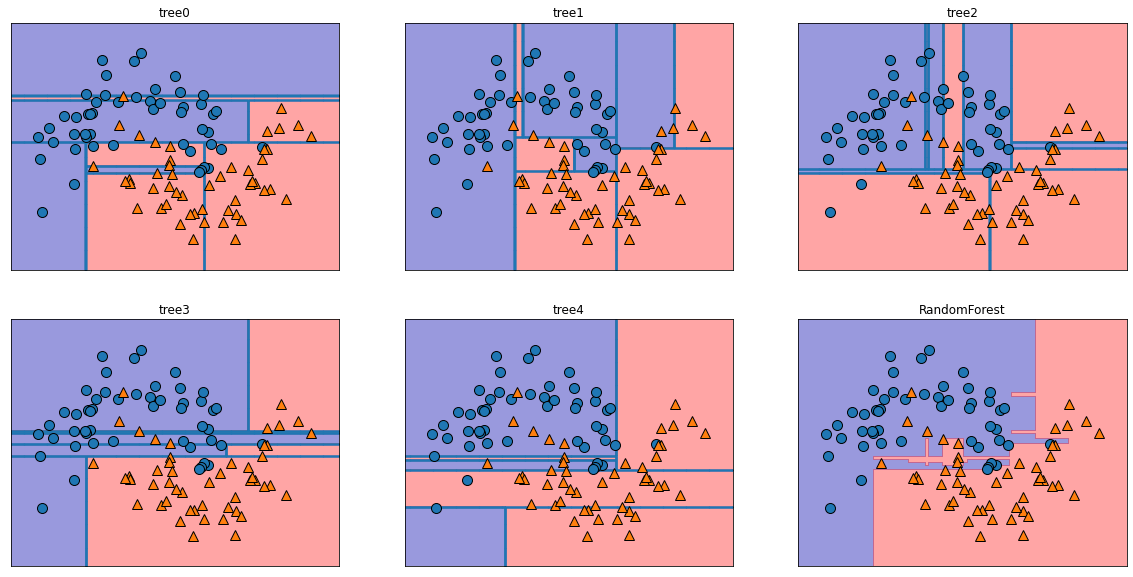

In [18]:
## 랜덤 포레스트 안에 만들어진 트리는 estimators_속성에 저장
## 각 트리에서 학습된 결정 경계와 이를 취합해 만든 결정 경계를 함께 시각화

fig, axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("tree{}".format(i))
  mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X,fill=True,ax=axes[-1,-1],alpha=.4) 
axes[-1,-1].set_title("RandomForest")
mglearn.discrete_scatter(X[:,0],X[:,1],y)

- 다섯 개의 트리가 만든 결정 경계는 확연히 다름
- 부트 스트랩 샘플링 때문에 한쪽 트리에 나타다는 훈련 포인트가 다른 트리에는 포함되지 않을 수 있어 각 트리는 불완전
- 랜덤 포레스트는 개개의 트리보다는 덜 과대적합되고 훨씬 좋은 결정 
- 실제 애플리케이션에서는 매우 많은 트리를 사용하기 때문에(수백, 수천) 더 부드러운 결정 경계가 만들어짐


In [19]:
# 유방암 데이터셋에 100개의 트리로 이뤄진 랜덤 포레스트를 적용해 볼 것

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)
forest=RandomForestClassifier(n_estimators=100, random_state=0 )                          # 트리를 100개 만듦
forest.fit(X_train, y_train)

print("훈련 세트 정확도:{:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.972


- 랜덤 포레스트는 매개변수 튜닝 없이 선형 모델이나 단일 결정 트리보다 높은 97퍼센트 정확도를 내고 있음
- 단일 결정 트리에서 한 것처럼 max_features 매개변수를 조정하거나 사전 가지치기를 할 수도 있음
- 랜덤 포레스트는 기본 설정으로도 좋은 결과를 만들어 줌
- 결정 트리처럼 랜덤 포레스트도 특성 중요도를 제공

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


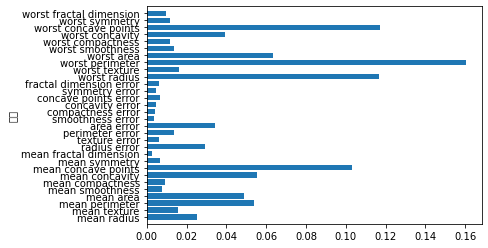

In [20]:
plot_feature_importances_cancer(forest)

- 랜덤 포레스트에서는 단일 트리의 경우보다 훨씬 많은 특성이 0이상의 중요도 값을 가짐
- 가장 많은 정보를 가진 특성으로는 "worst perimeter"를 선택함
- 랜덤 포레스트를 만드는 무작위성은 알고리즘이 가능성 있는 많은 경우를 고려할 수 있도록 하므로, 그 결과 랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼 수 있음



---


### 장단점과 매개변수





- 회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되고 있음
- 성능 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없음
- 랜덤 포레스트는 단일 트리의 단점을 보완하고 장점은 그대로 가지고 있음
-만약 의사 결정 과정을 간소하게 표현해야 한다면 단일 트리 사용 좋음
- 왜냐하면, 수십, 수백 개의 트리를 자세히 분석하기 어렵고 랜덤 포레스트의 트리는 결정 트리보다 더 깊어지는 경향도 있기 때문
- 비전문가에게 예측 과정을 시각적으로 보여주기에는 하나의 결정 트리가 좋음


---
- 대량의 데이터셋에서 랜덤 포레스트 모델을 만들 때 다소 시간이 걸리지만 CPU 코어가 많다면 손쉽게 병렬 처리할 수 있음
- 멀티 코어 프로세서(요즘 컴퓨터는 코어가 둘 이상)n_jobs 매개변수를 이용하여 사용할 코어 수를 지정할 수 있음
- 사용하는 CPU 코어 개수에 비례해서 속도도 빨라짐
- 코어를 두 개 사용하면 훈련 속도도 두 배 빨라짐
- 그러나 n_jobs 매개변수를 코어 개수보다 크게 지정하는 것은 별로 도움되지 않음
- 그래서 **n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용**하므로 이걸 써랏!


---
    [유념]  random_state를 지정하지 않으면 or 지정하면 전혀 다른 모델이 만들어짐
    랜덤 포레스트의 트리가 많을 수록 random_state 값의 변화에 따른 변동이 적음
    만약 같은 결과를 만들어야 한다면 random_state 값을 고정해야 함

- 랜덤 포레스트는 텍스트 데이터 가티 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않음
- 이런 데이터에는 선형 모델이 더 적합
- 매우 큰 데이터셋세도 잘 작동하며 훈련은 여러 cpu 코어로 간단하게 병렬화할 수 있음
- 그러나 랜덤 포레스트는 선형 모델보다 많은 메모리를 사용하며 훈련과 예측이 느림
- 속도와 메모리 사용에 제약이 있는 애플리케이션이라면 선형 모델이 적합할 수 있음
- 중요 매개변수는 **n_estimators, max_features**이고 **max_depth** 같은 사전 가지치기 옵션이 있음 
- n_estimators는 클수록 좋음, 더 많은 트리를 평균하면 과대적합을 줄여 더 안정적인 모델을 만듦
- 이로 인해 잃는 것도 있는데, 더 많은 트리는 더 많은 메모리와 긴 훈련 시간으로 이어짐, 가용한 시간 메모리만큼 다 사용하는게 좋음
- max_features는 각 트리가 얼마나 무작위가 될지를 결정하며 작은 max_features는 과대적합을 줄여줌
- 일반적으로 기본값을 쓰는 것은 좋은 방법
- 분류에서는 max_features=sqrt(n_features)이고 회귀에서는 max_features=n_features임
- max_features나 max_leaf_nodes 매개변수를 추가하면 가끔 성능이 향상됨   



### 그래디언트 부스팅 회귀 트리
- 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법
- 이름은 회귀지만 분류에도 사용 가능
- 랜덤 포레스트와는 달리 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듦
- 기본적으로 그래디언트 부스팅 회귀 트리에는 무작위성이 없음
- 대신 강력한 사전 가지치기를 사용
- 그래디언트 부스팅 트리는 보통 하나에서 다섯 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측이 빠름
- 그래디언트 부스팅의 근본 아이디어는 이런 얕은 트리 같은 간단한 모델(weak learner)을 많이 연결하는 것
- 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될 수록 성능이 좋음
- 랜덤 포레스트보다 매개변수 설정에 조금 더 민감
- 앙상블 방식에 있는 사전 가지치기나 트리 개수 외에도 그래디언트 부스팅에서 중요한 매개변수는 **이전 트리의 오차를 얼마나 강하게 보정**할 것인지를 제어하는 **learning_rate**
- 학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만듦
-n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 더 많아짐


In [21]:
cancer.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test,y_train,y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도:{:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(gbrt.score(X_test, y_test)))   ## 훈련 세트 정확도가 100이니 과대적합된 것, 트리의 최대 깊이를 줄여 

                                                                        ## 사전 가지치기를 하거나 학습률을 낮출 수 있음

훈련 세트 정확도:1.000
테스트 세트 정확도:0.965


In [23]:
gbrt=GradientBoostingClassifier(random_state=0, max_depth=1)       # 트리의 최대 깊이를 1개로 제한
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도:{:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도:0.991
테스트 세트 정확도:0.972


In [24]:
gbrt=GradientBoostingClassifier(random_state=0, learning_rate=0.01)            # 학습률을 낮춤
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도:{:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도:0.988
테스트 세트 정확도:0.965


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


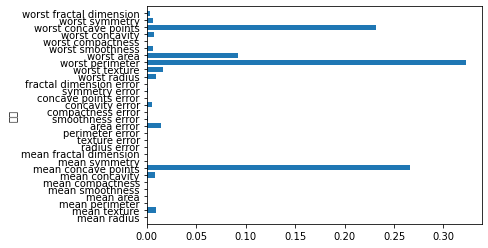

In [25]:
# 다른 결정 트리 기반 모델처럼 특성의 중요도를 시각화하면 모델을 더 잘 이해할 수 있음

gbrt=GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

- 그래디언트 부스팅 트리의 특성 중요도 그래프가 랜덤 포레스트와 비슷한 특성을 강조하고 있음
- 그러나 그래디언트 부스팅은 일부 특성은 완전히 무시하고 있음
- 그래디언트 부스팅과 랜덤 포레스트 중 랜덤 포레스트가 더 안정적이라서 더 사용함
- 그러나 예측 시간이 중요하거나 머신러닝 모델에서 마지막 성능까지 쥐어짜야 할 때 그래디언스 부스팅 사용


---
### 장단점과 매개변수
- 단점은 매개변수를 잘 조정해야 하는 것과 훈련 시간이 길다는 것
- 다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 되고 이진 특성이나 연속적인 특성에서도 잘 작동
- 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 작동하지 않음
- 그래디언트 부스팅 트리 모델의 중요 매개변수는 **트리의 개수를 지정하는 n_estimators**와 **이전 트리의 오차를 보정하는 정도를 조절하는 learning_rate**임
- learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야 함
- n_estimators를 크게 하면 모델이 복잡해지고 과대적합될 가능성이 높아짐
- 일반적인 관례는 가용한 시간과 메모리 한도에서 n_estimators를 맞추고 나서 적절한 learning_rate를 찾는 것
- scikit-learn 0.20 에서는 조기 종료를 위한 매개변수 n_iter_no_change와 validation_fraction이 추가 됨
-  n_iter_no_change는 반복 동안 검증 점수가 향상되지 않으면 조기 종료, validation_fraction은 훈련 데이터에서 저만큼 검증 데이터로 사용
- max_depth(또는 max_leaf_nodes)는 트리의 복잡도를 낮추기 때문에 매우 중요
- 통상적으로 max_depth를 아주 작게 설정하며 **트리의 깊이가 5보다 깊어지지 않도록 함**


## 2.3.7 배깅, 엑스트라 트리, 에이다부스트



In [52]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']


In [54]:
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

In [55]:
Xm, ym=make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test=train_test_split(
    Xm,ym,stratify=ym,random_state=42
)
cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

### 배깅

- 배깅은 Booststrap aggregating 의 줄임말
- 배깅은 중복을 허용한 랜덤 샘플링으로 만든 훈련세트를 사용하여 분류기를 각기 다르게 학습 시킴
- 부트스트랩 샘플을 만드는 것은 앞서 살펴본 랜덤 포레스트의 특징과 같음
- 분류기가 predict_proba()메서드를 지원하는 경우 확류랎을 평균하여 예측을 수행
- 그렇지 않은 분류기를 사용할 때는 가장 빈도가 높은 클래스 레이블이 예측 결과가 됨


In [56]:
# 배깅을 사용하여 cancer 데이터셋에 로지스틱 회귀 모델을 100개 훈련하여 앙상블해보겠음

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

- 위 코드에서 LogisticRegression 객체를 기반 분류기로 전달하고 훈련할 분류기의 개수는 100개로 지정(n_estimators=100),
-  oob_score를 True로 지정하면 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가(이 값을 OOB 오차라고 부름)
- oob_score 값을 통해 테스트 세트의 성능을 짐작할 수 있음
- RandomForestClassifier도 oob_score 매개변수를 지원
- 이 두 모델은 모두 이 매개변수의 기본값을 False로 가짐

In [57]:
print("훈련세트정확도:{:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트세트정확도:{:.3f}".format(bagging.score(Xc_test, yc_test)))
print("oob세트정확도:{:.3f}".format(bagging.oob_score_))

훈련세트정확도:0.953
테스트세트정확도:0.958
oob세트정확도:0.941


In [58]:
# 결정 트리로 배깅을 수행하는 것보다 랜덤 포레스트를 사용하는 것이 편리하지만 여기서는 직접 결정 트리에 배깅을 적용

from sklearn.tree import DecisionTreeClassifier
bagging=BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

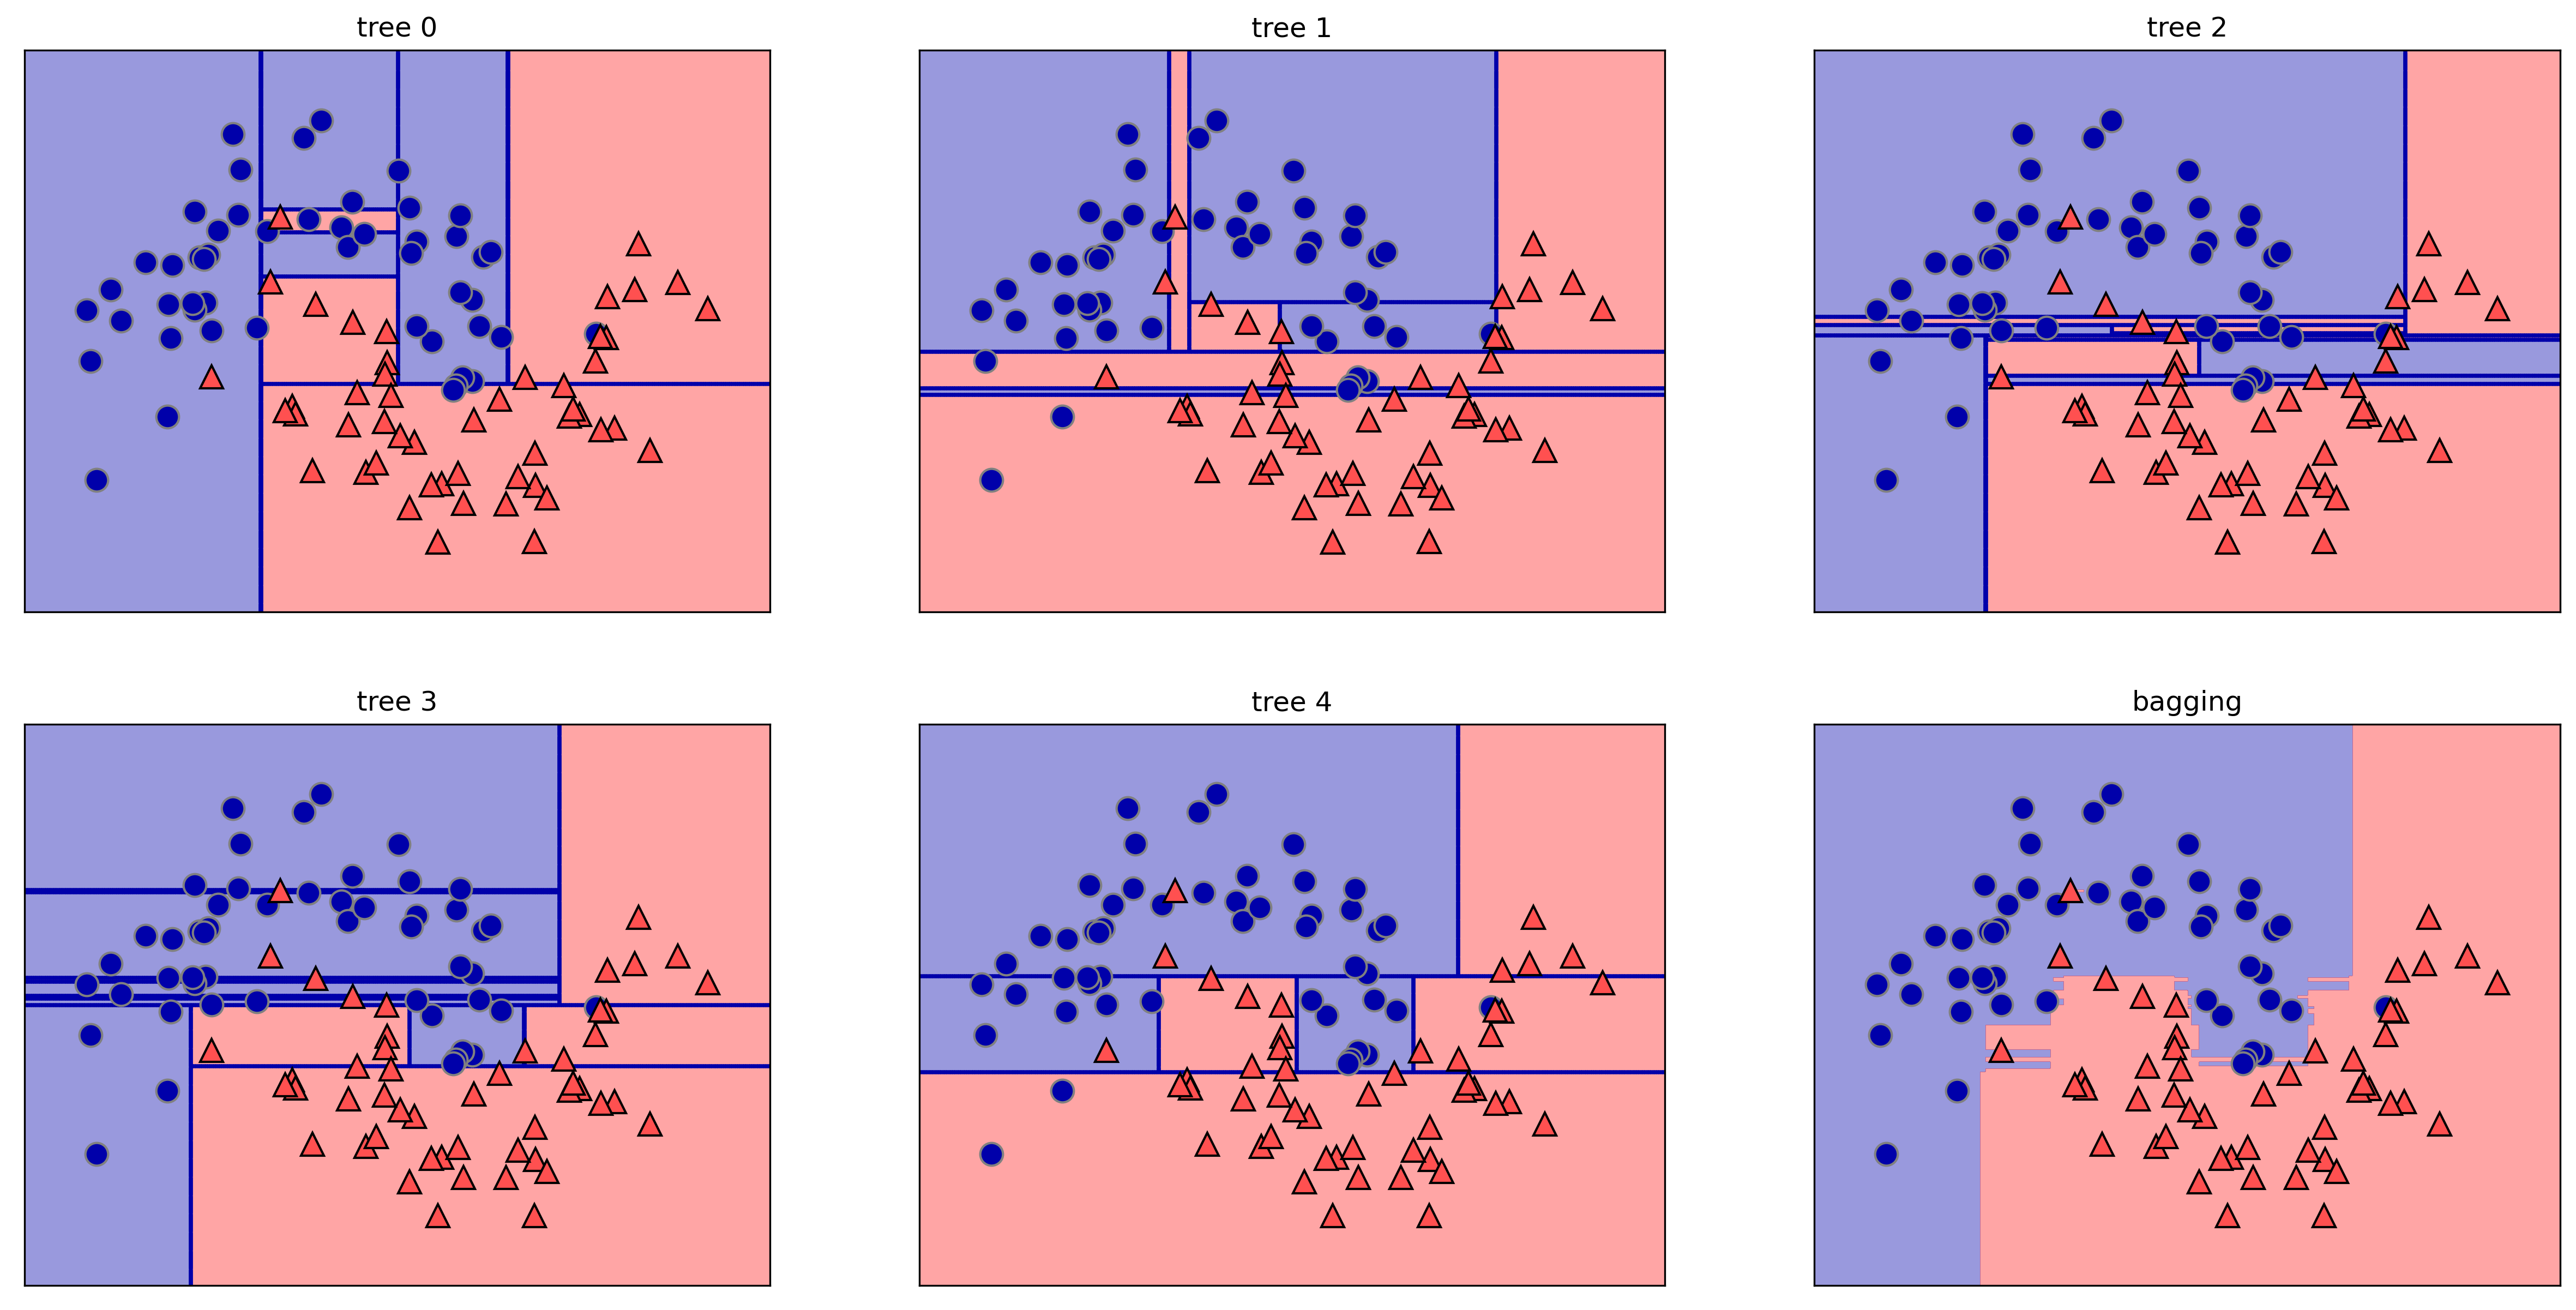

In [63]:
# 랜덤 포레스트에서처럼 이 배깅 분류기에 있는 결정 트리의 결정 경계를 시각화
# 그 결과는 랜덤 포레스트의 결정 경계와 매우 비슷

fig, axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
  ax.set_title("tree {}".format(i))
  mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("bagging")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

In [66]:
# 이번에는 n_estimators를 100으로 늘려서 cancer 데이터셋에 훈련시켜보고 훈련 세트와 테스트 세트의 성능을 확인

bagging=BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)
bagging.fit(Xc_train, yc_train)

print("훈련세트정확도:{:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트세트정확도:{:.3f}".format(bagging.score(Xc_test, yc_test)))
print("oob세트정확도:{:.3f}".format(bagging.oob_score_))

훈련세트정확도:1.000
테스트세트정확도:0.965
oob세트정확도:0.948


- 배깅은 랜덤 포레스트와 달리 max_samples 매개변수에서 부트스트랩 샘플의 크기를 지정할 수 있음
- 또한 랜덤 포레스트는 DecisionTreeClassifier(splitter="best")를 사용하도록 고정되어 있음
- 결정 트리를 spliter='random'으로 설정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾음
- 이런 결정 트리의 배깅 앙상블은 다음에 사펴볼 엑스트라 트리와 관련이 많음

### 엑스트라 트리
- 랜덤 포레스트와 비슷하지만 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾음
- 랜덤 포레스트와 달리 DecisionTreeClassifier(splitter='random')을 사용하고 부트스트랩 샘플링은 적용하지 않음
- 무작위성을 증가시키면 일반적으로 모델의 편향이 늘어나지만 분산이 감소
- 엑스트라 트리와 랜덤 포레스트는 다른 방식으로 모델에 무작위성을 주입한다고 볼 수 있음
- 예측 방식은 랜덤 포레스트와 동일하게 각 트리가 만든 확률값을 평균함


In [67]:
# two_moons 데이터셋에 엑스트라 트리를 적용하여 결정 경계를 확인해 보겠음
# 후보 노드를 랜덤하게 분할한 다음 최선의 분할을 찾기 때문에 개별 트리의 결정 경계가 더 복잡해졌음
# 개별 트리를 앙상블한 엑스트라 트리의 결정 경계는 비교적 안정적

from sklearn.ensemble import ExtraTreesClassifier
xtree=ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)

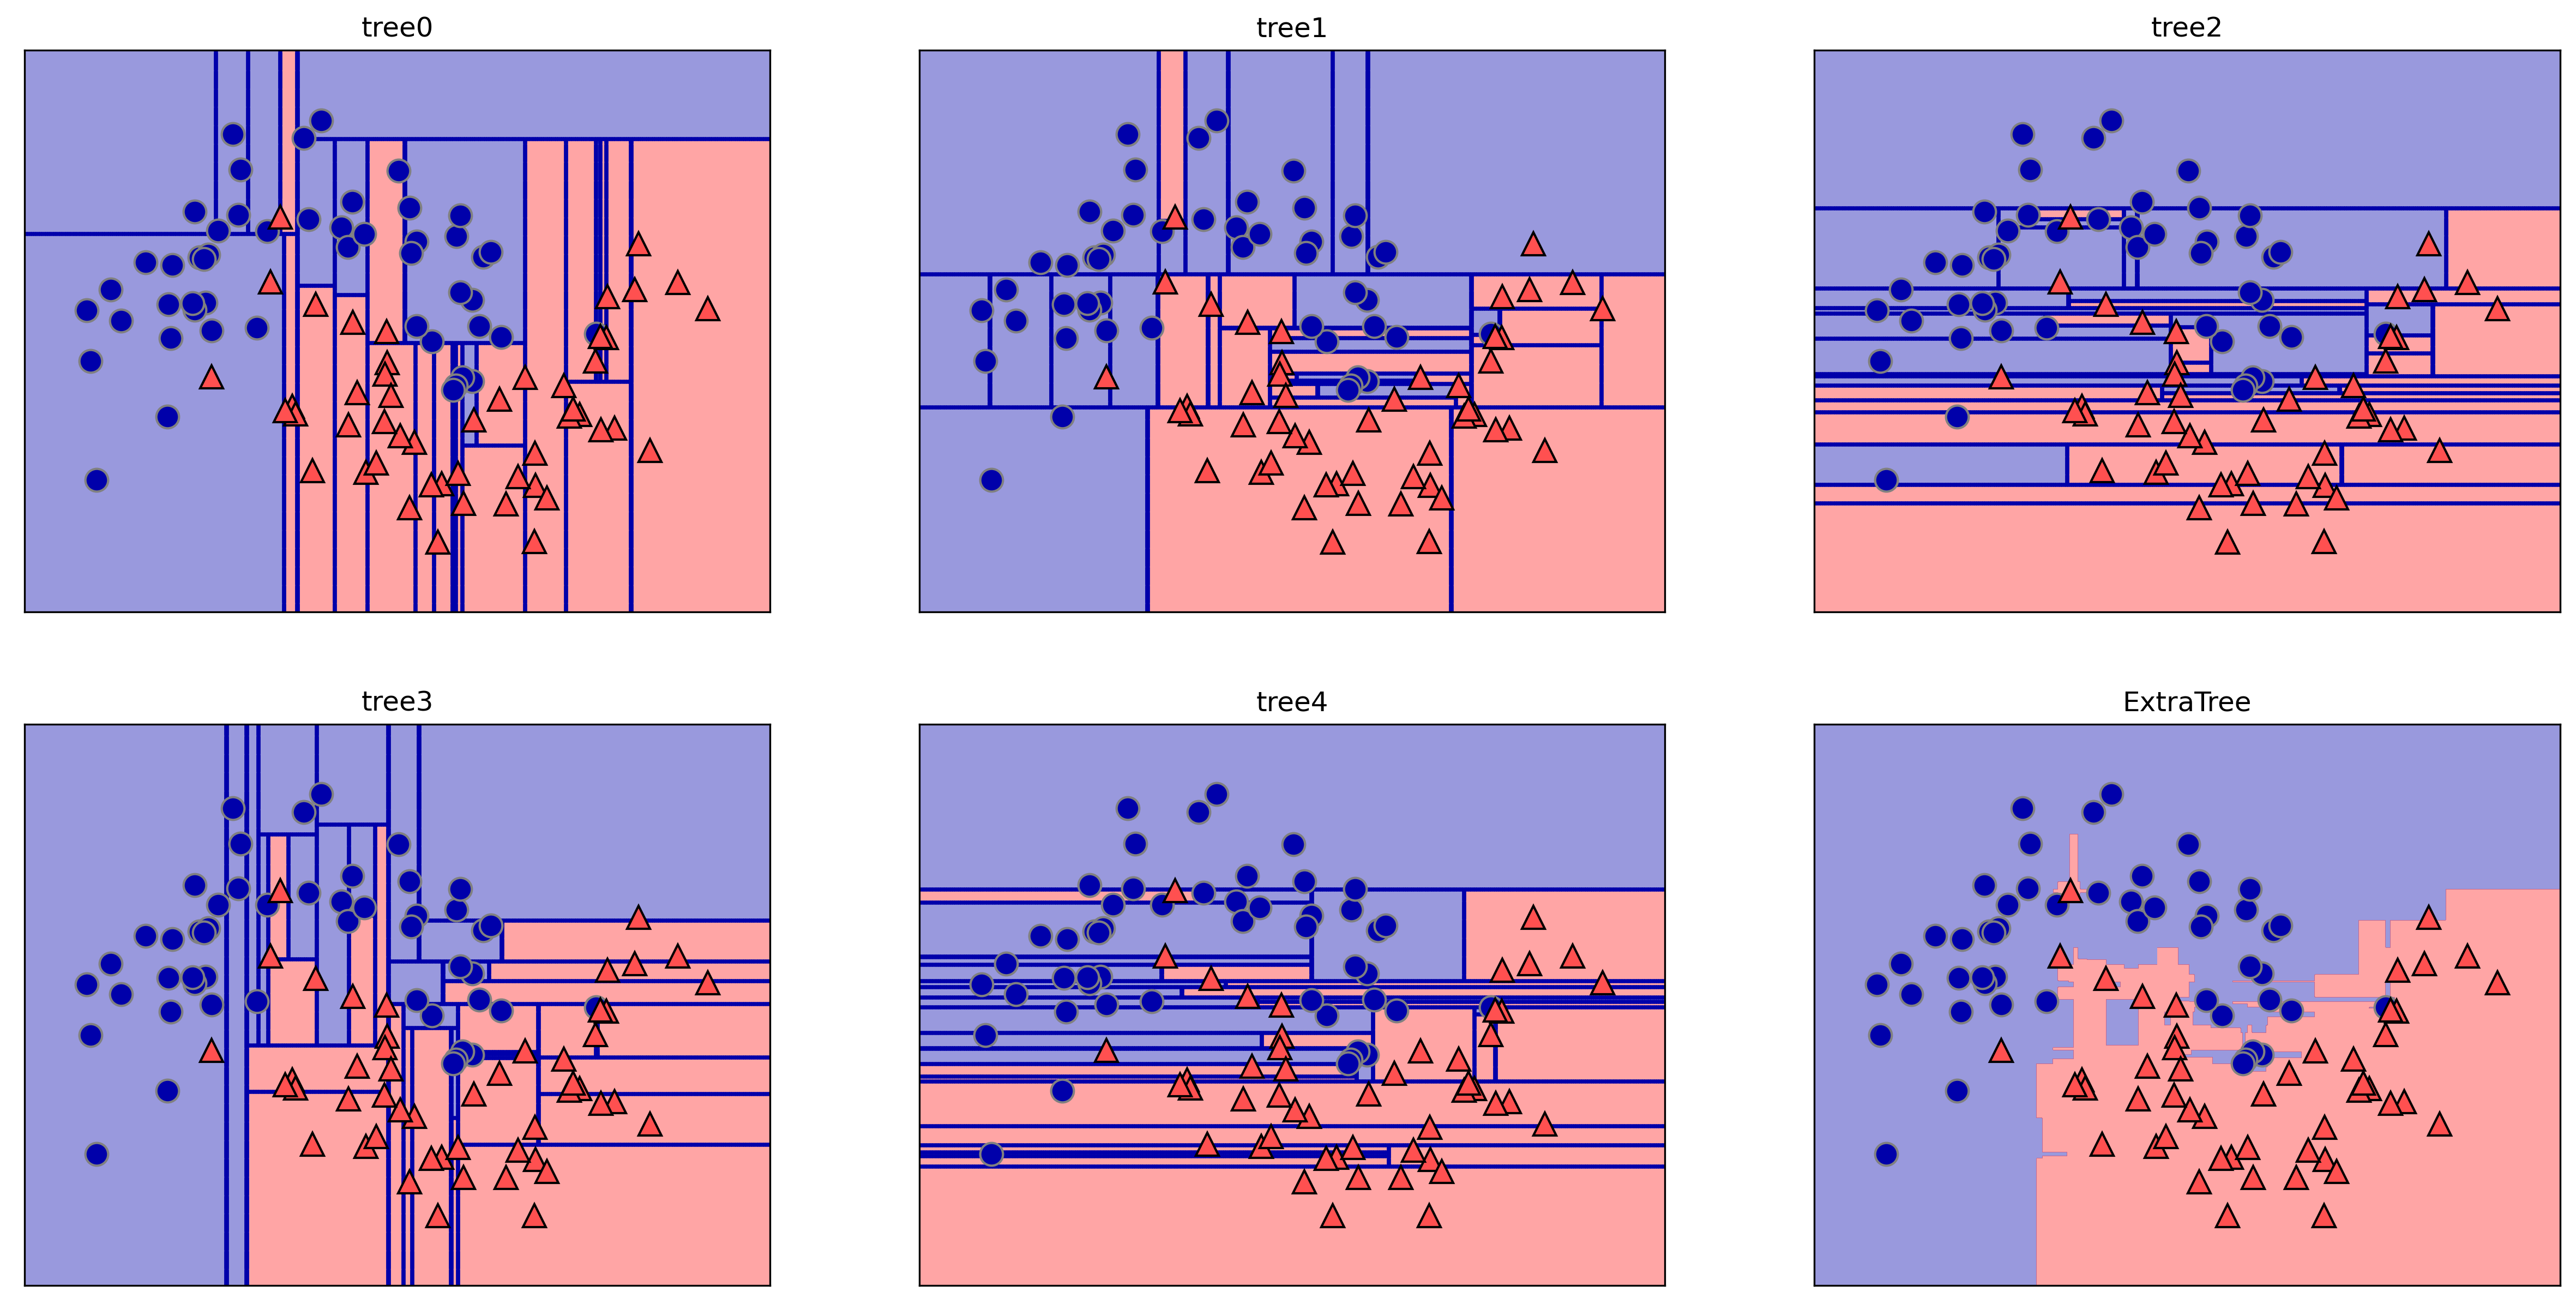

In [68]:
fig, axes=plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
  ax.set_title("tree{}".format(i))
  mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1,-1], alpha=.4) 
axes[-1,-1].set_title("ExtraTree")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show() 

In [69]:
# 이번엔 트리 개수를 100으로 지정, cancer 데이터셋

xtree=ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)


print("훈련세트정확도:{:.3f}".format(xtree.score(Xc_train, yc_train)))
print("테스트세트정확도:{:.3f}".format(xtree.score(Xc_test, yc_test)))

## 엑스트라 트리는 랜덤 포레스트와 거의 같은 성능을 내고 있음
## 엑스트라 트리가 랜덤 포레스트보다 계산 비용이 비교적 적지만 무작위 분할 때문에 
# 일반화 성능을 높이려면 종종 많은 트리를 만들어야 함
# 일반적으로 랜덤 포레스트가 더 선호되는 이유

훈련세트정확도:1.000
테스트세트정확도:0.972


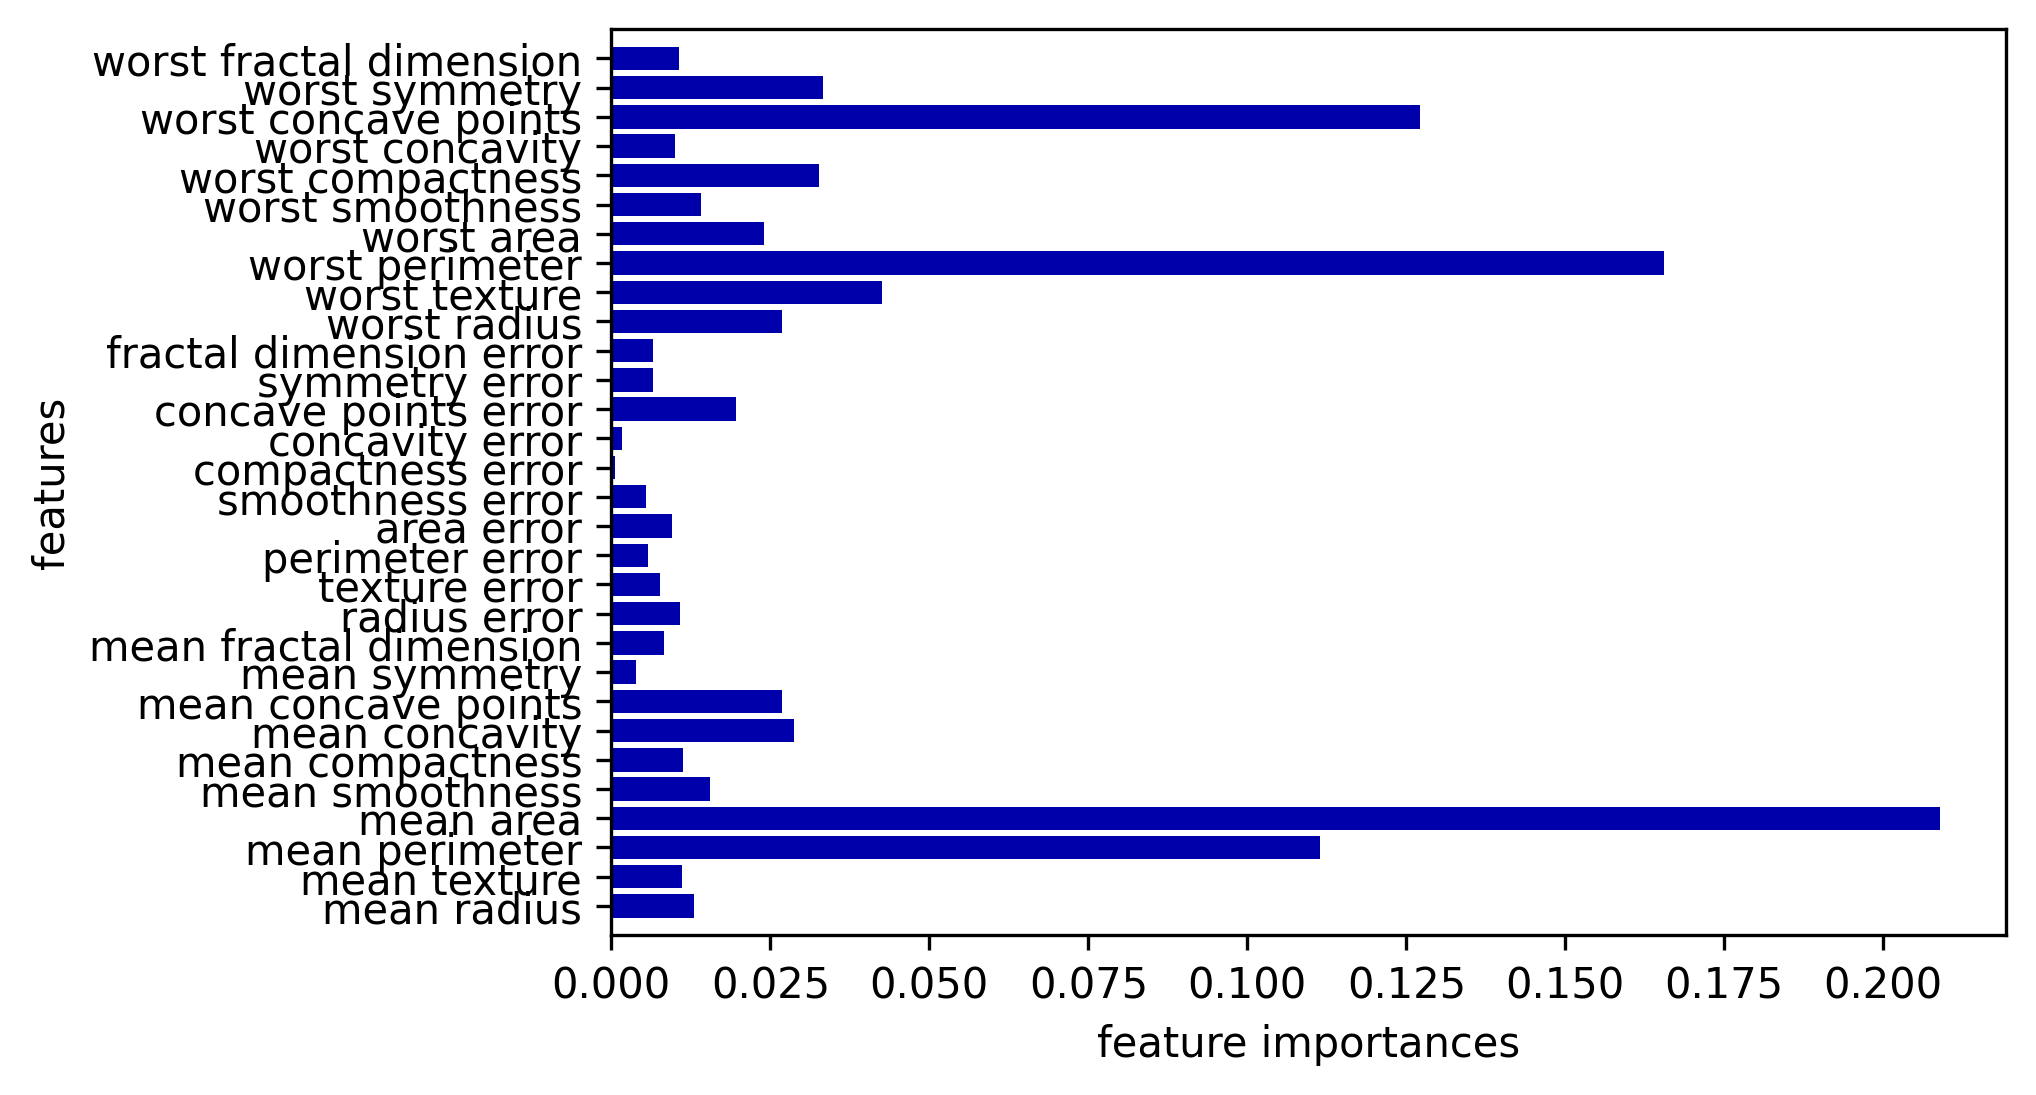

In [70]:
n_features=cancer.data.shape[1]

plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("feature importances")
plt.ylabel("features")
plt.ylim(-1,n_features)
plt.show()

### 에이다부스트

- Adaptice Boosting 의 줄임말
- 그래디언트 부스팅처럼 약한 학습기를 사용
- 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킴
- 훈련된 각 모델은 **성능에 따라 가중치가 부여**
- 예측을 만들 때에는 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택
- scikit-learn의 AdaBoostClassifier는 기본값으로 DecisionTreeClassifier(max_depth=1)를 사용하여 AdaBoostRegressor는 DecisionTreeRegressor(max_depth=3)를 사용하지만 base_estimator 매개변수에서 다른 모델을 지정할 수도 있음
- 그래디언트 부스팅과 마찬가지로 순차적으로 학습해야 하므로 n_jobs 매개변수를 지원하지 않음
- 여기에서는 기본값을 사용하여 two_moons 데이터셋과 cancer 데이터셋에 적용해보겠음

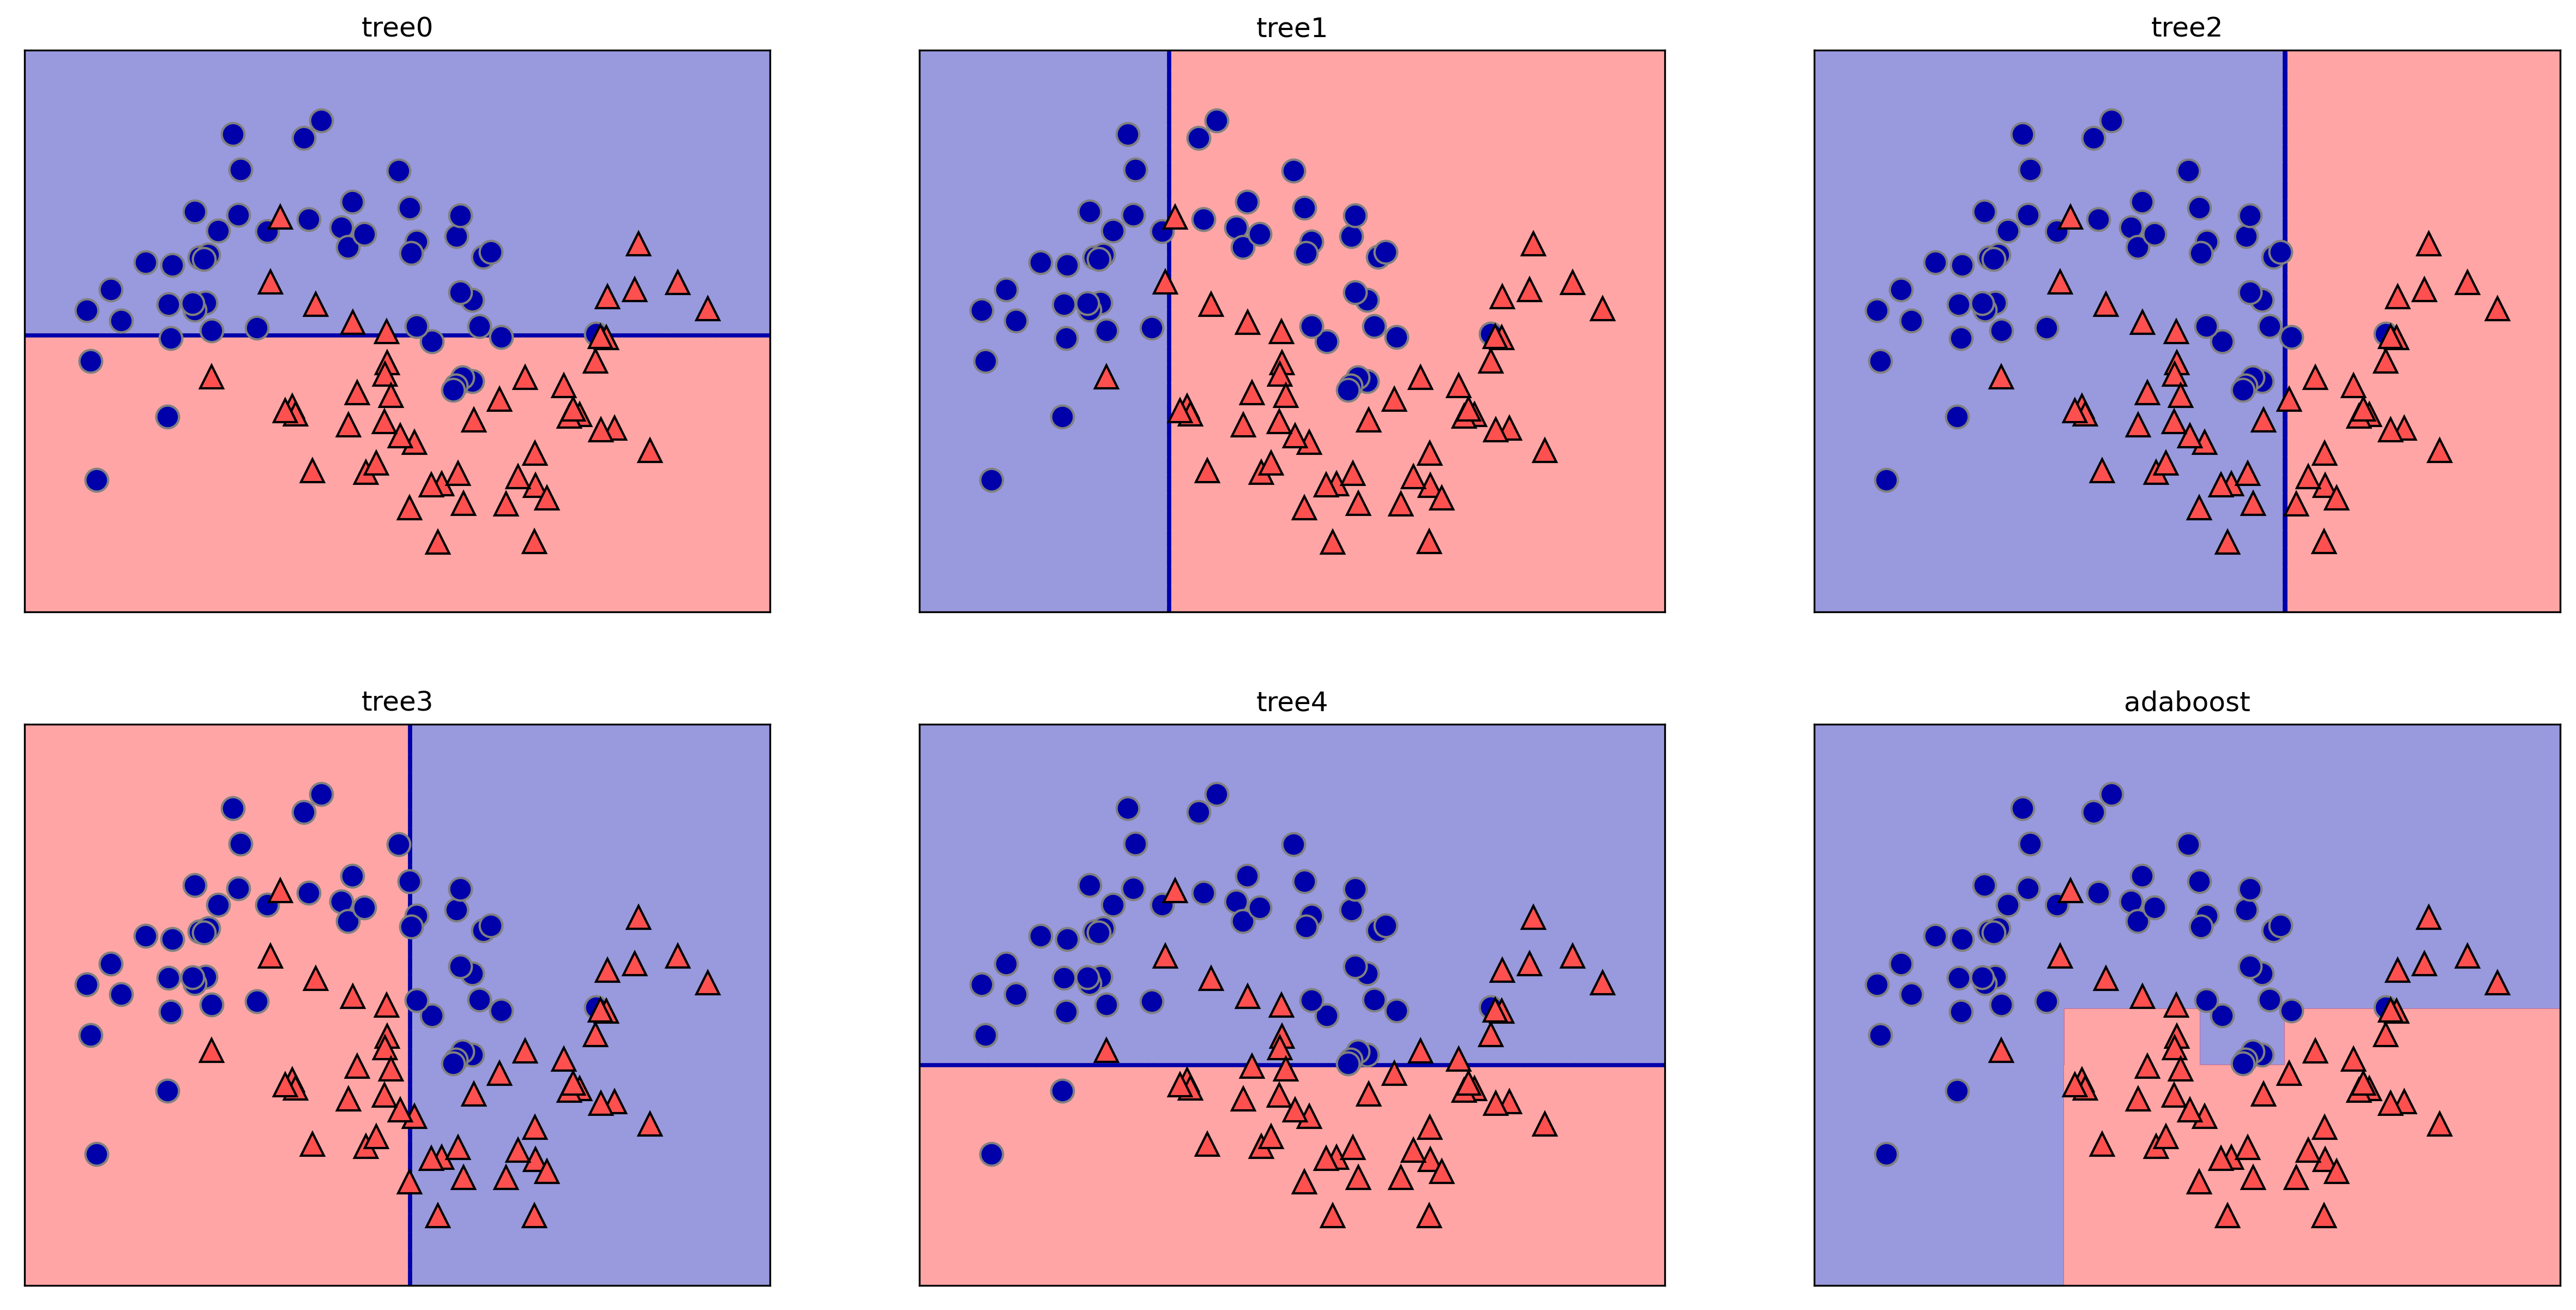

In [72]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

fig, axes=plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
  ax.set_title("tree{}".format(i))
  mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(ada,Xm,fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title('adaboost')
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

In [73]:
# AdaBoostClassifier는 깊이가 1인 결정 트리를 사용하기 때문에 각 트리의 결정 경계가 직선 하나임
# 앙상블된 결정 경계도 다른 앙상블 모델에 비해 좀 더 단순함
# 이번엔 cancer 데이터셋에 적용해 봄

ada=AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [74]:
print("훈련세트정확도:{:.3f}".format(ada.score(Xc_train, yc_train)))
print("테스트세트정확도:{:.3f}".format(ada.score(Xc_test, yc_test)))

훈련세트정확도:1.000
테스트세트정확도:0.986


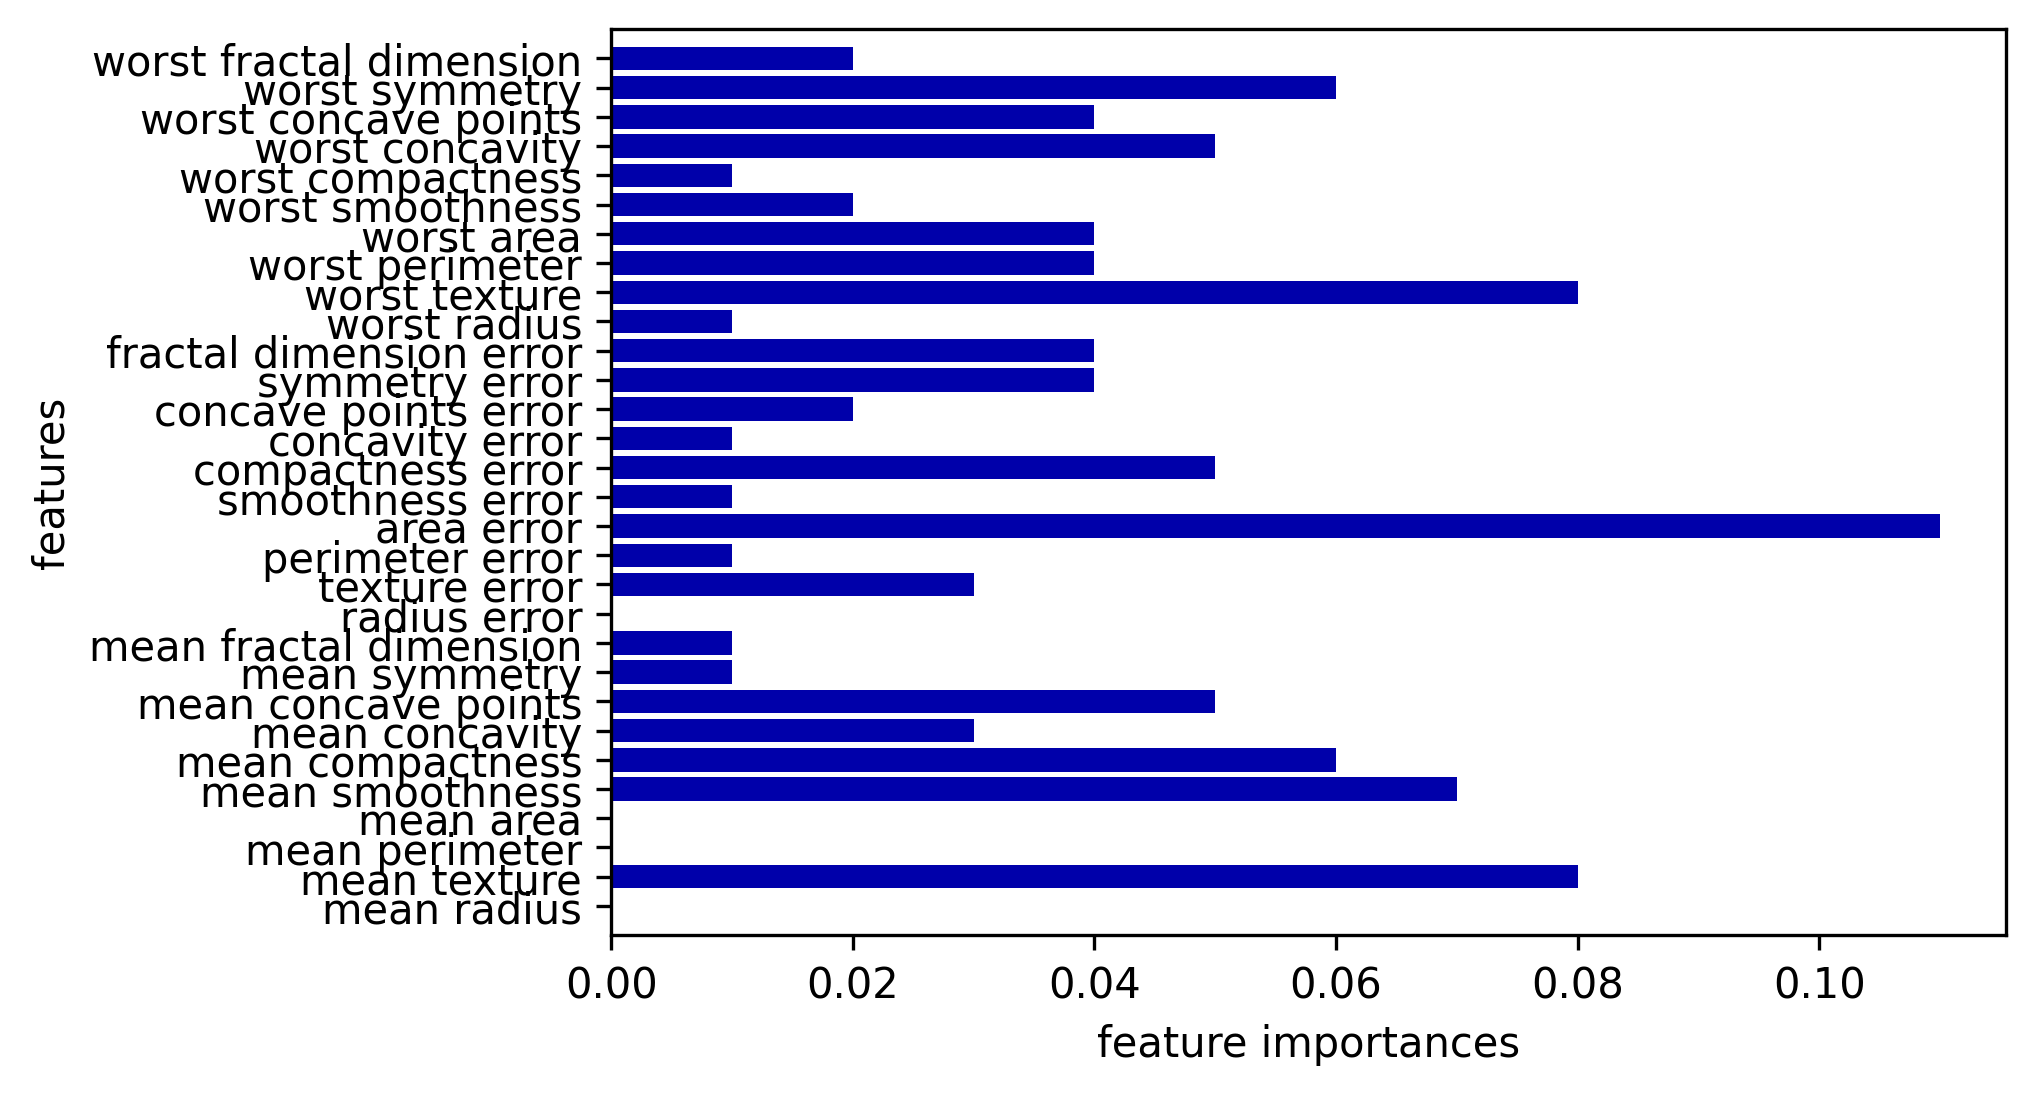

In [76]:
# 아주 얕은 트리를 앙상블했기 때문에 일반화 성능이 조금 더 향상됨
# 에이다부스트의 특성 중요도를 확인해보면 다른 모델에서 부각되지 않았던 'area error'가 크게 강조되고 있음

plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('feature importances')
plt.ylabel('features')
plt.ylim(-1,n_features)
plt.show()